# Lab 2: Polynomial Features - Fitting Curves!

## Welcome to Lab 2!

In Lab 1, you learned to fit straight lines. Now let's fit **curves**!

### What You'll Learn:
- How to create polynomial features
- When curves work better than lines
- How to avoid overfitting with polynomials
- Visualizing different polynomial degrees

**Let's start!**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

plt.style.use('seaborn-v0_8-darkgrid')
np.random.seed(42)

print("Ready to fit curves!")

Ready to fit curves!


## Step 1: Create Curved Data

Let's create data that follows a curve (not a straight line).

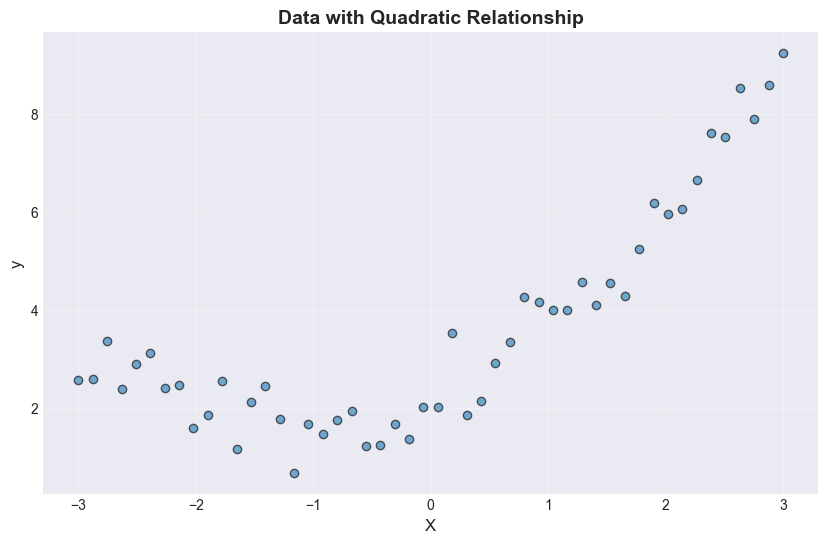

See the U-shape? This data needs a curve, not a straight line!


In [22]:
# Generate quadratic data
X = np.linspace(-3, 3, 50).reshape(-1, 1)
y = 0.5 * X**2 + X + 2 + np.random.randn(50, 1) * 0.5
#y = X**2  # No linear term needed!

# Visualize
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.6, edgecolors='black')
plt.xlabel('X', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title('Data with Quadratic Relationship', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.show()

print("See the U-shape? This data needs a curve, not a straight line!")

## TODO 1: Try Linear Regression First

Fit a straight line to this curved data and see what happens!

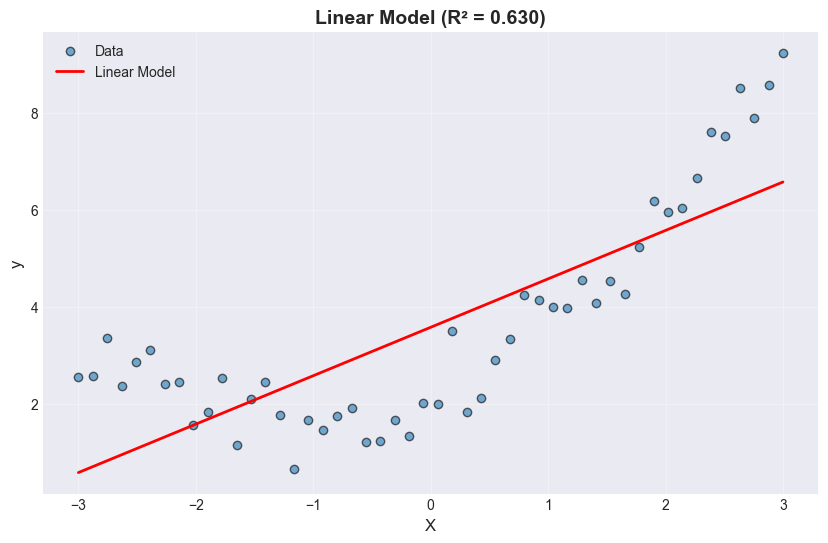

Linear model R²: 0.630
Not great! The line misses the curve!


In [23]:
# TODO 1: Fit linear regression and calculate R²
linear_model =  LinearRegression()
# YOUR CODE: Fit the model
linear_model.fit(X, y)

r2_linear =  linear_model.score(X, y)

# Predict
y_linear =  linear_model.predict(X)

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.6, edgecolors='black', label='Data')
plt.plot(X, y_linear, 'r-', linewidth=2, label='Linear Model')
plt.xlabel('X', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title(f'Linear Model (R² = {r2_linear:.3f})', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(f"Linear model R²: {r2_linear:.3f}")
print("Not great! The line misses the curve!")

## TODO 2: Create Polynomial Features

Transform X into polynomial features of degree 2.

In [24]:
# TODO 2: Create polynomial features
poly_features =  PolynomialFeatures(degree=2)
X_poly =  poly_features.fit_transform(X)

print("Original X shape:", X.shape)
print("Polynomial X shape:", X_poly.shape)
print("\nWe added x² as a feature!")
print("Example:", X_poly[:5])

Original X shape: (50, 1)
Polynomial X shape: (50, 3)

We added x² as a feature!
Example: [[ 1.         -3.          9.        ]
 [ 1.         -2.87755102  8.28029988]
 [ 1.         -2.75510204  7.59058726]
 [ 1.         -2.63265306  6.93086214]
 [ 1.         -2.51020408  6.30112453]]


## TODO 3: Fit Polynomial Model

Train a model on polynomial features.

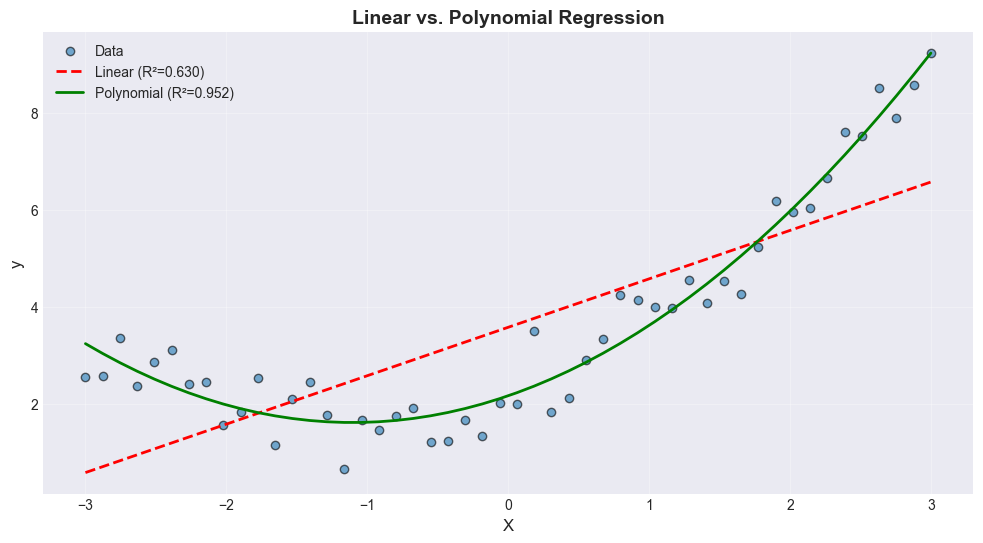


Linear R²: 0.630
Polynomial R²: 0.952
Improvement: 32.2 percentage points!


In [25]:
# TODO 3: Fit polynomial regression
poly_model =  LinearRegression()
# YOUR CODE: Fit on X_poly
poly_model.fit(X_poly, y)
r2_poly =  poly_model.score(X_poly, y)

y_poly =  poly_model.predict(X_poly)

# Plot comparison
plt.figure(figsize=(12, 6))
plt.scatter(X, y, alpha=0.6, edgecolors='black', label='Data')
plt.plot(X, y_linear, 'r--', linewidth=2, label=f'Linear (R²={r2_linear:.3f})')
plt.plot(X, y_poly, 'g-', linewidth=2, label=f'Polynomial (R²={r2_poly:.3f})')
plt.xlabel('X', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title('Linear vs. Polynomial Regression', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(f"\nLinear R²: {r2_linear:.3f}")
print(f"Polynomial R²: {r2_poly:.3f}")
print(f"Improvement: {(r2_poly - r2_linear)*100:.1f} percentage points!")

In [26]:
# Permutation Importance
from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(poly_model, X_poly, y, n_repeats=10)
print(perm_importance.importances_mean)


[0.         1.38978145 0.61771788]


## TODO 4: Try Different Polynomial Degrees

Create models with degrees 1, 2, 5, and 10.

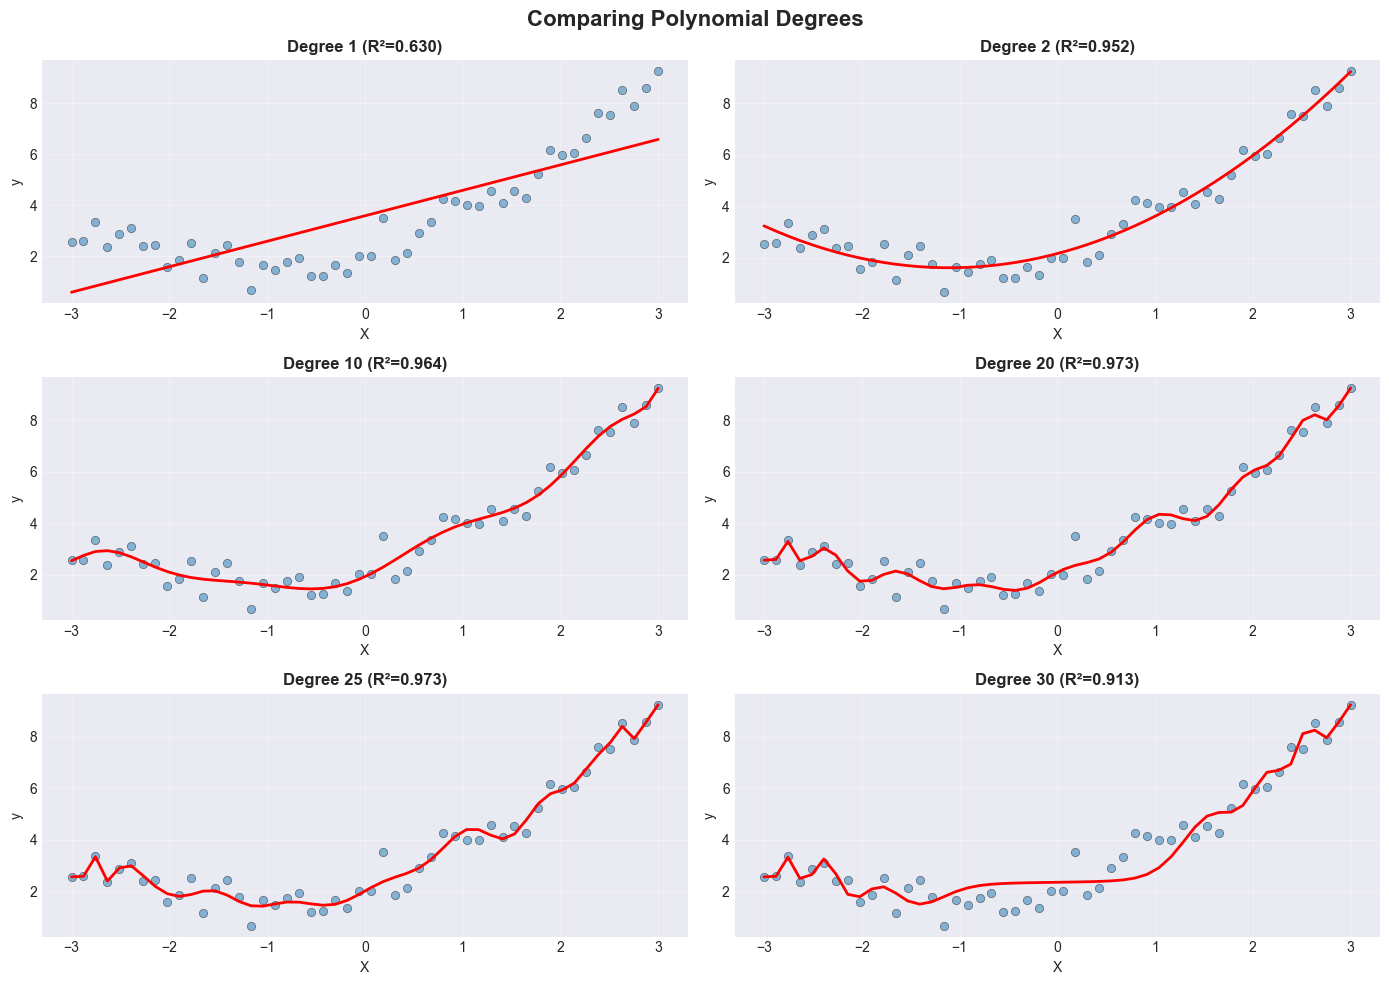

Which degree fits best without overfitting?


In [32]:
# TODO 4: Compare different degrees
degrees = [1, 2, 10, 20, 25, 30]
fig, axes = plt.subplots(3, 2, figsize=(14, 10))
fig.suptitle('Comparing Polynomial Degrees', fontsize=16, fontweight='bold')

for idx, degree in enumerate(degrees):
    ax = axes[idx // 2, idx % 2]
    
    # YOUR CODE: Create polynomial model with this degree
    # Hint: Use Pipeline
    poly_model = Pipeline([
        ('poly_features', PolynomialFeatures(degree=degree)),
        ('linear_regression', LinearRegression())
    ])
    
    poly_model.fit(X, y)
    y_pred = poly_model.predict(X)
    r2 = r2_score(y, y_pred)
    
    ax.scatter(X, y, alpha=0.5, edgecolors='black', linewidths=0.5)
    ax.plot(X, y_pred, 'r-', linewidth=2)
    ax.set_title(f'Degree {degree} (R²={r2:.3f})', fontweight='bold')
    ax.set_xlabel('X')
    ax.set_ylabel('y')
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Which degree fits best without overfitting?")

## Solutions

In [ ]:
# SOLUTION TO TODO 1
linear_model = LinearRegression()
linear_model.fit(X, y)
r2_linear = linear_model.score(X, y)
y_linear = linear_model.predict(X)

In [ ]:
# SOLUTION TO TODO 2
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [ ]:
# SOLUTION TO TODO 3
poly_model = LinearRegression()
poly_model.fit(X_poly, y)
r2_poly = poly_model.score(X_poly, y)
y_poly = poly_model.predict(X_poly)

## Congratulations!

You now know how to fit curves to data using Polynomial Regression!

**Key Lessons:**
- Straight lines don't fit everything
- Polynomial features let you fit curves
- Higher degree = more complex curves
- Too high degree = overfitting!

**Next:** Lab 3 on Regularization!